In [1]:
# Librerias básicas
# ==============================================================================
import numpy as np
import scipy as sc
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
n1 = 145
n2 = 134

loreto = np.array(np.fix(np.random.rand((n1)) * 50 + 24), dtype='int')
junin = np.array(np.fix(np.random.rand((n2)) * 60 + 24), dtype='int')

loreto = {
    'loreto': loreto
}

junin = {
    'junin': junin
}

loreto = pd.DataFrame(data=loreto)
junin = pd.DataFrame(data=junin)

loreto.info()
junin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   loreto  145 non-null    int32
dtypes: int32(1)
memory usage: 708.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   junin   134 non-null    int32
dtypes: int32(1)
memory usage: 664.0 bytes


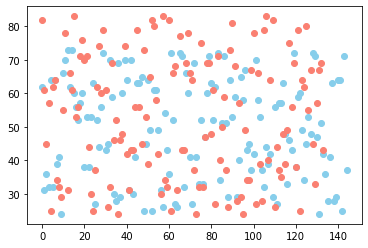

In [3]:
# Gráficos distribución observada
# ==============================================================================
plt.scatter(list(range(len(loreto.loreto.tolist()))), loreto, c='skyblue')
plt.scatter(list(range(len(junin.junin.tolist()))), junin, c='salmon')
plt.show()

In [4]:
# Estadísticos descriptivos por grupo
# ==============================================================================
print(loreto.describe())
print(junin.describe())

           loreto
count  145.000000
mean    49.468966
std     14.920649
min     24.000000
25%     37.000000
50%     51.000000
75%     63.000000
max     73.000000
            junin
count  134.000000
mean    53.171642
std     18.287810
min     24.000000
25%     37.000000
50%     55.000000
75%     69.000000
max     83.000000


In [5]:
def dif_mean(x1, x2):
    '''
    Función para calcular la diferencia de medias entre dos grupos.
    
    Parameters
    ----------
    x1 : numpy array
         valores de la muestra 1.
         
    x2 : numpy array
         valores de la muestra 2.
         
    Returns
    -------
    estadístico: float
        valor del estadístico.
    '''
    
    estadistico = np.mean(x1) - np.mean(x2)
    return(estadistico)

In [6]:
def test_var(x1, x2, var1, var2):
    '''
    Función para calcular el estadistico de test z.
    
    Parameters
    ----------
    x1 : numpy array
         valores de la muestra 1.
         
    x2 : numpy array
         valores de la muestra 2.
         
    Returns
    -------
    estadístico: float
        valor del estadístico.
    '''
    estadistico = (dif_mean(x1, x2) - 0) / np.sqrt((var1 ** 2) / len(x1.tolist()) + (var2 ** 2) / len(x2.tolist()))
    return estadistico

In [11]:
var1 = 9
var2 = 16

z_score = test_var(loreto.loreto, junin.junin, var1, var2)

In [14]:
p_value = stats.norm.sf(abs(z_score))

In [20]:
print("Nuestro z-score es: ", z_score)
print("Nuestro p-valor es: ", p_value)

Nuestro z-score es:  -2.356400890041568
Nuestro p-valor es:  0.009226495547687253


In [21]:
stats.ttest_ind(loreto.loreto, junin.junin, 0)

Ttest_indResult(statistic=-1.8588659542860673, pvalue=0.06410659664361186)